In [241]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
import random

# <center>Newton-Raphson and Chaos</center>

As a “project at the end” of my [Calculus the 2nd](https://books.google.com/booksid=QNfZls4urMoC&lpg=PA390&ots=WmHejXcSxN&dq=calculus%3A%20The%20Language%20of%20Change%20Cohen%20henle%20newton-raphson%20chaos&pg=PA390#v=onepage&q=calculus:%20The%20Language%20of%20Change%20Cohen%20henle%20newton-raphson%20chaos&f=false) course with [James Henle](https://www.smith.edu/academics/faculty/james-henle), my task was to explore and understand the [Newton-Raphson (N-R)](https://web.mit.edu/10.001/Web/Course_Notes/NLAE/node6.html) method of finding the unknown roots of a function. I explored the values generated by the N-R method when roots **do not exist,** the results where chaos.  
Here, I am pleased to reproduce the work, and expand on it with platforms beyond what we had at the time.

### A Brief Newton-Raphson History and Summary:

The Newton-Raphson Method is so named for Isaac Newton, and Joseph Raphson. [Newton wrote his work](https://www.newtonproject.ox.ac.uk/his-life-and-work-at-a-glance) on the subject in 1671, but it was not published until 1736. A simpler version, and the one most used today, was written by [Raphson](https://royalsocietypublishing.org/doi/10.1098/rsnr.1990.0016) in [1690](https://books.google.com/books?id=JYQ_AAAAcAAJ&printsec=frontcover#v=onepage&q&f=false). It’s also essential to recognize that knowledge virtually always comes before when it was popularly made available. In this case, the first recorded method of finding roots is known as the Babylonian Method, as it is believed to have been used in that time. The first purported recording of the method was in 60 AD, by the Greek Mathemetician, Hero, or Heron, of [Alexandria](https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095932997?rskey=jkyjdD&result=12). We can assume the concept is older than we know. 

When the roots of a function are unknown, we may find them using the Newton-Raphson Method. An initial guess of the root is plotted on the x-axis, and from there a line tangent to the curve of the function is drawn, passing through the point of the guess and the x-axis. The point on the x-axis gives us a better guess. We repeat the process from there.  

Another way of looking at the N-R Method is that it is an approximation of the original function using the first couple of terms in a Taylor series  

$$f(x) = f(x_0) + f'(x_0)(x-x_0) + 1/2 f''(x_0)(x-x_0)^2 + ... = 0 $$  
&nbsp;&nbsp;&nbsp;&nbsp;that is, the terms that are linear
$$f(x) = f(x_0) + f'(x_0)(x-x_0)$$  


&nbsp;&nbsp;&nbsp;&nbsp;The following would be approximated by  $$f(x)= 2x^4+x^3+x-4$$  
  
  
  $$f(x)=x-4$$  
    
&nbsp;&nbsp;&nbsp;&nbsp;Simply, we approximate the function by leaving out the values of $x$ raised to a power $< 2$.  

### The **N-R iteration formula**, is:


$$q_n = q_{n-1}-\frac{f(x)}{f’(x)}\  $$
&nbsp;&nbsp;&nbsp;&nbsp;where $q(n)$ is the $nth$ guess, if not finally the root, and $q(n-1)$ is the one prior to it, minus the function $f(x)$ divided by its derivative.

### Suppose then, ###
&nbsp;&nbsp;&nbsp;&nbsp;We look for the roots of a function which has no roots: $$f(x)=x^4-x+B$$ 

$$x_n = x_{n-1}-\frac{x^4-x}{4x^3-1} $$ &nbsp;&nbsp;&nbsp;&nbsp;for $$f(x)=x^4-x$$&nbsp;&nbsp;&nbsp;&nbsp;and $$f'(x)=4x^3-1$$

&nbsp;&nbsp;&nbsp;&nbsp;$B$ allows us to shift the function up and down, taking us away from the two real roots.

$$x_n = x_{n-1}-\frac{x^4-x+1}{4x^3-1} $$

### Now for the fun part,

Let's take our function with no real roots, and plot an $n$ bunch of guesses for roots anyway. 

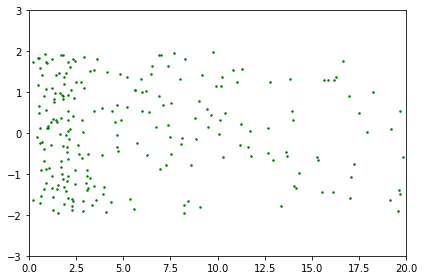

In [225]:
n = 0 # guesses
b = 0 # moving up the x-axis, 0 to 2, increments of .10
x = .25  # initial arbitrary guess


while n < 500: # 500 guesses
    fx =  (x ** 4)+x #f(x), modified
    fprimex =  (4*x**3)+1  #f'(x)
     
     
    q = ((fx)+b)/fprimex  # modified N-R method
    b += .1 # increase b by .10 each guess
    x = round(random.uniform(-2,2), 2) # new guess
    n += 1 #increment counter
  
    plt.xlim(0, 20)
    plt.ylim(-3, 3)

    plt.plot(q, x, 'go',markersize=1.5)
    plt.tight_layout()
   # print ( q, x, fx, fprimex) # if you are curious about the numerical output 

For my calc II project, I wrote some code in Python, because at the time I was desperate to learn Python.
I don't know what all was really available to visualize the output like we have now.
Then, I generated numerical output, and plotted it in R. Below are some images from that project, using various window scale and plot shape and size.  
Note: nowadays there is even a Newton-Raphson built-in, but it does not really like it when you take the roots away.

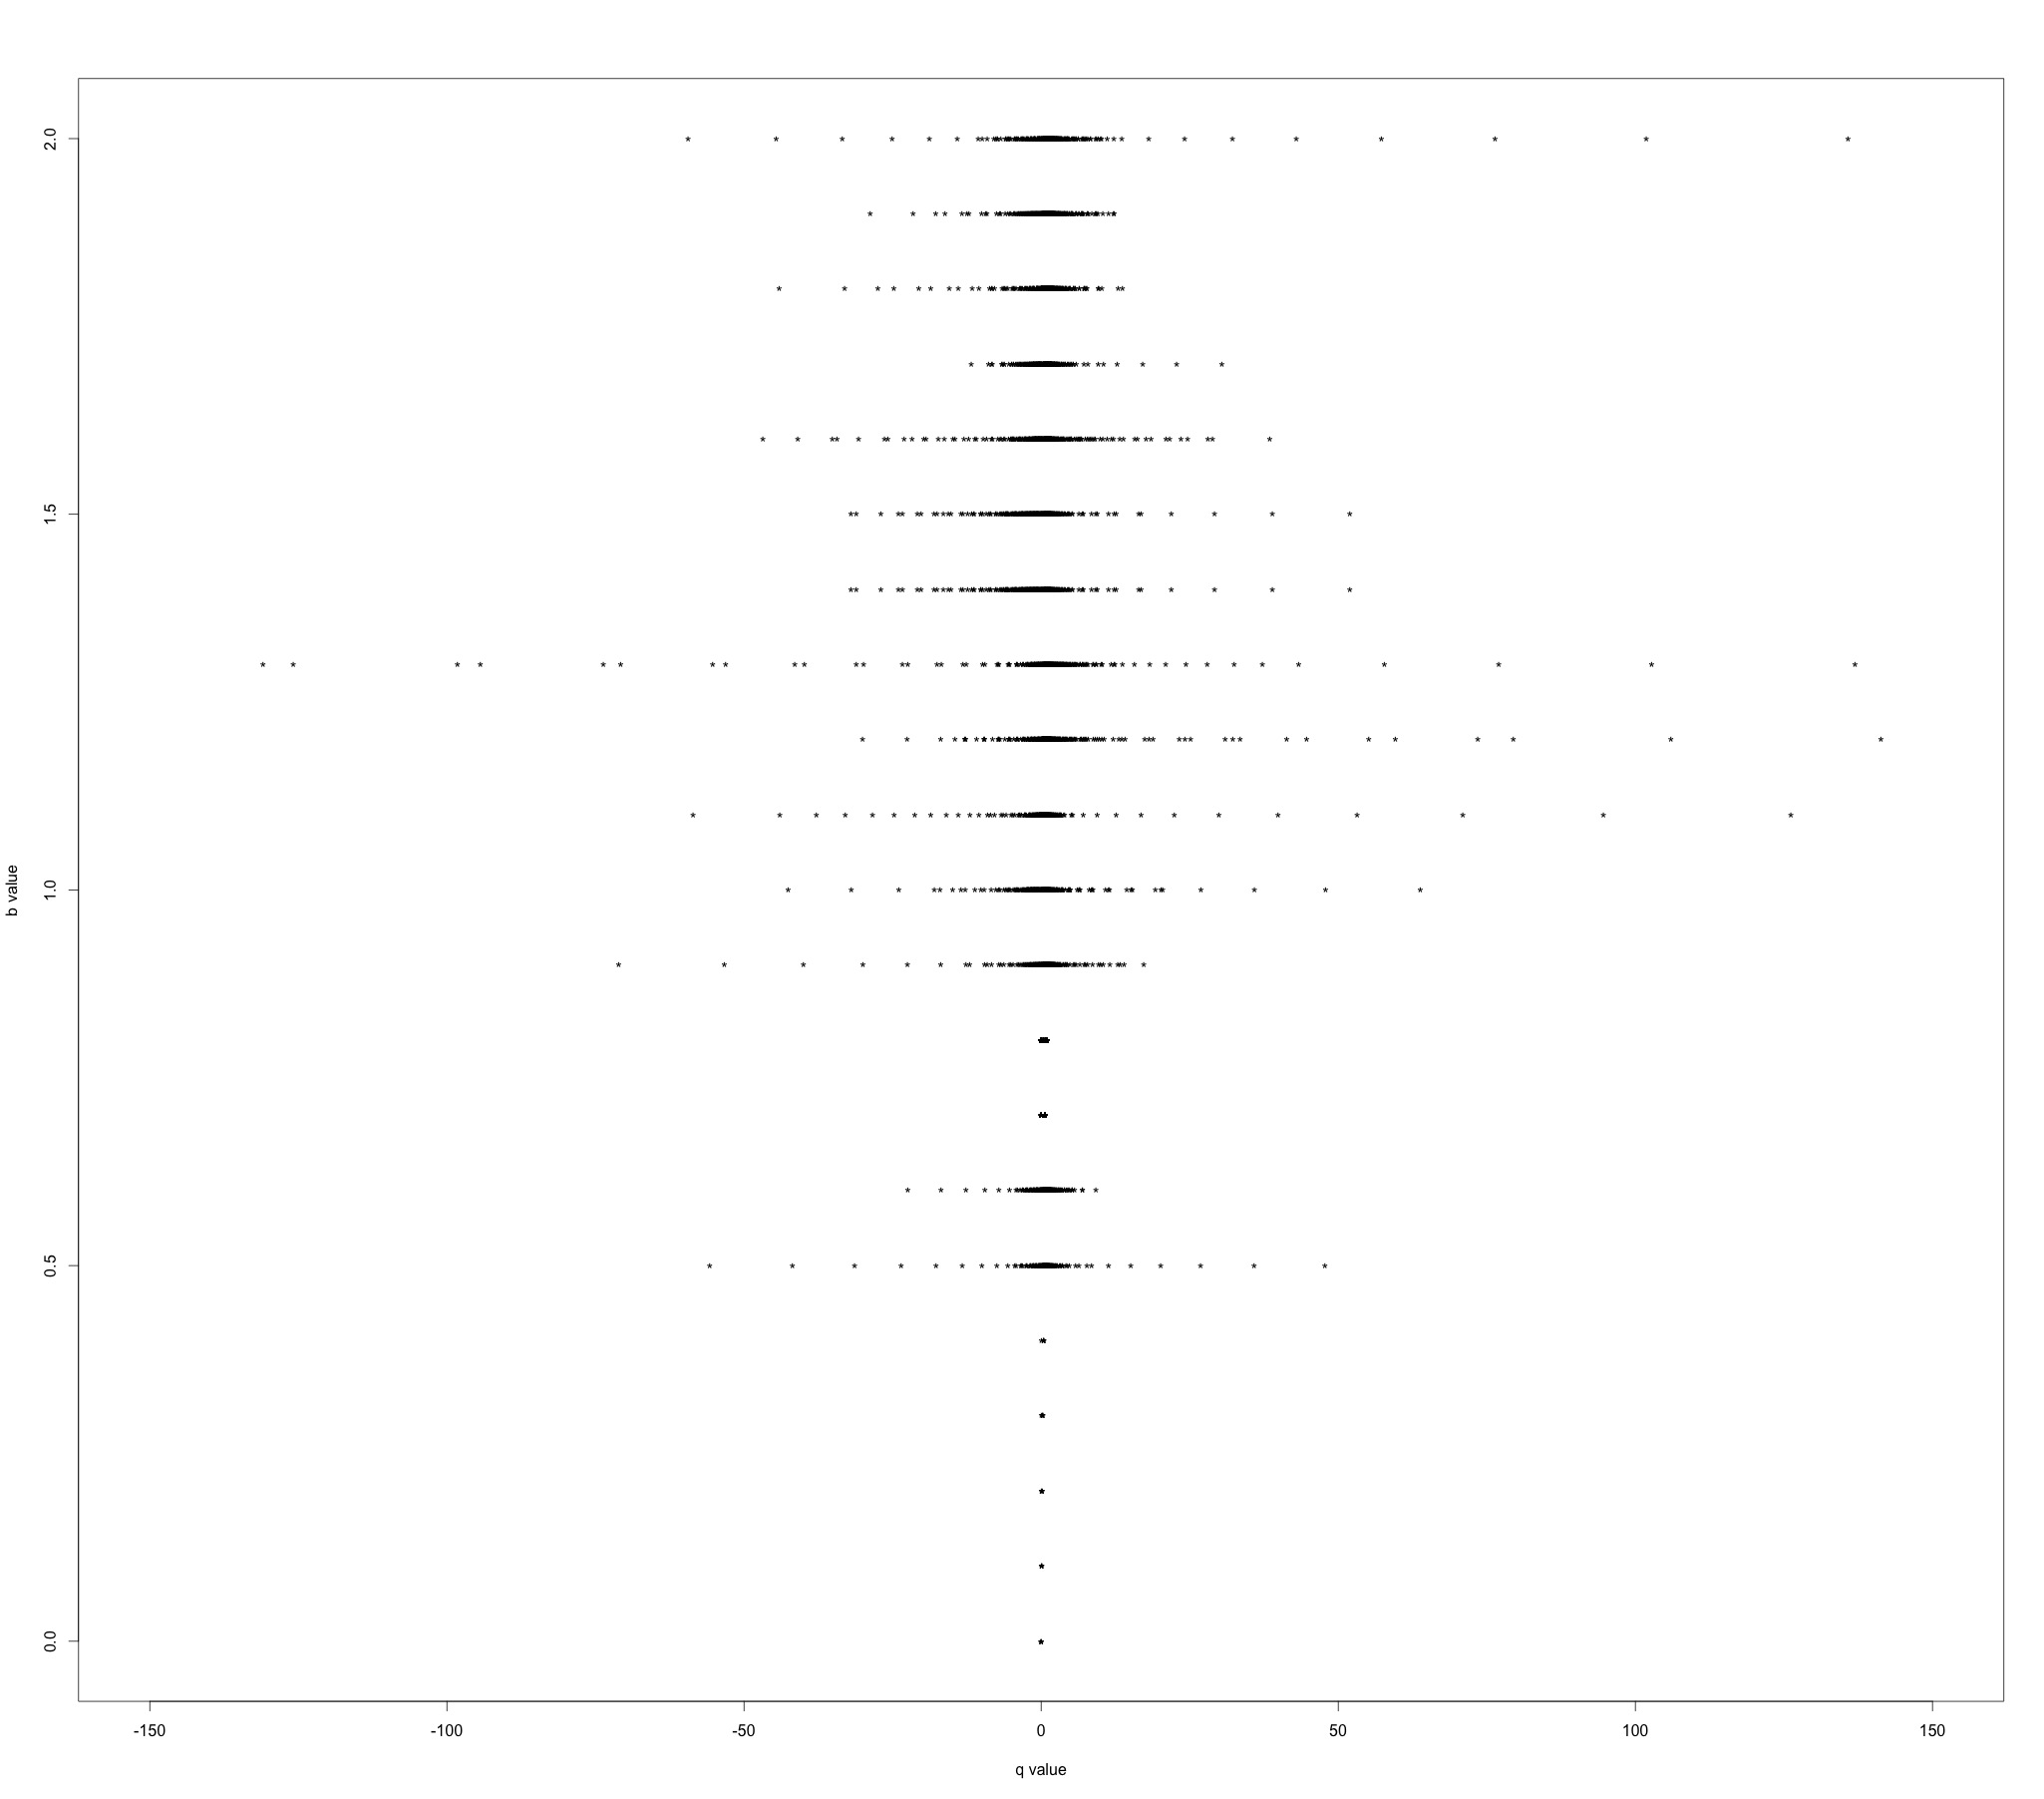

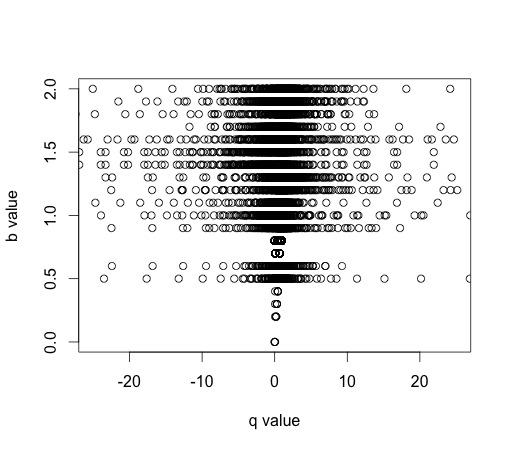

**The** questions I was exploring with this choaotic output were along the lines of "what's up with the density in various places?" "What about the 'J' shapes we see sometimes?" 

But at the time, the questions remained mostly open. I thought maybe a rounding error.  
A couple of years later, I asked another professor, [Joshua Bowman](https://seaver.pepperdine.edu/academics/faculty/joshua-bowman/), for his insight. To my delight, he suggested that the patterns in the choas may be more easily seen in the complex plain. He suggested [FractalStream](http://pi.math.cornell.edu/~noonan/fstream.html), by Matt Noonan. It's definitely worth checking out!

Now though, we can take this chaos, and make it $complex$. The code below is from  [Learning Scientific Programming with Python]((https://scipython.com/book2/chapter-8-scipy/examples/the-newton-fractal/). The code is a straightforward reproduction, except I changed the fractal colors.

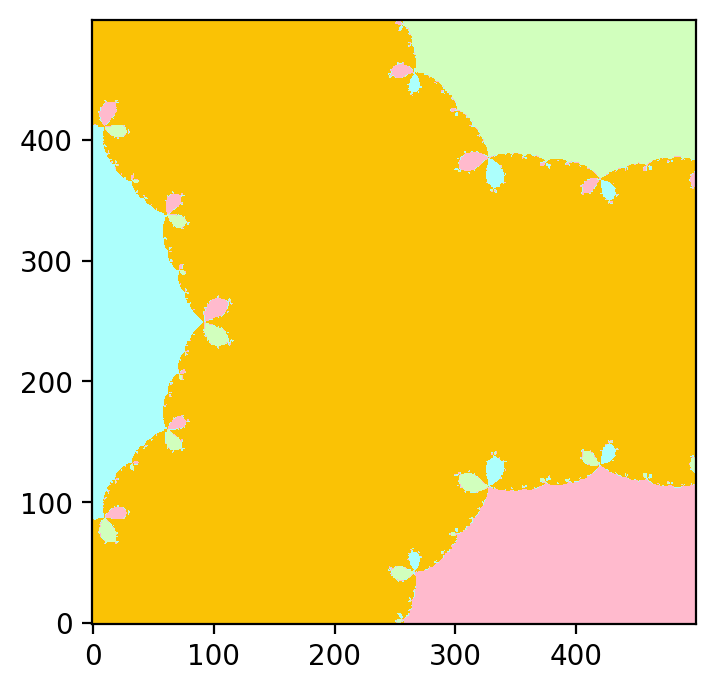

In [247]:
plt.rcParams['figure.dpi'] = 200 #this is rather high resolution, you can change it if needs be

# A list of colors to distinguish the roots. 
colors = ['xkcd:goldenrod', 'xkcd:light cyan', 'xkcd:pastel pink', 'xkcd:very light green']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('on') #you can change this to off and remove the scale display
    plt.show()

f = lambda z: z**4 + z
fprime = lambda z: 4*z**3 + 1

plot_newton_fractal(f, fprime, n=500)

Fractals are way cool. But, there's more!

**We** can change the axis display and look closely at some of the [basins of attraction](https://acme.byu.edu/0000017a-1bb8-db63-a97e-7bfa0bec0000/newtons-pdf). Below is the N-R Chaos code, with just numerical output, and you can get a good idea of what the basins might be. Compare it to the fractal, the code is repeated below with window scale options included. 

In [240]:
n = 0 # guesses
b = 0 # moving up the x-axis, 0 to 2, increments of .10
x = .25  # initial arbitrary guess
z = []

while n < 500: # 500 guesses
    fx =  (x ** 4)+x #f(x), modified
    fprimex =  (4*x**3)+1  #f'(x)
     
     
    q = ((fx)+b)/fprimex  # modified N-R method
    b += .1 # increase b by .10 each guess
    x = round(random.uniform(-2,2), 2) # new guess
    n += 1 #increment counter
    z.append(q)
    #plt.xlim(0, 20)
    #plt.ylim(-3, 3)

    #plt.plot(q, x, 'go',markersize=1.5)
    #plt.tight_layout()
print (sorted(z)) 

[-663.4505138339937, -214.22116599104018, -153.39355351378302, -139.5465340302967, -93.60950798390319, -85.54077341583074, -60.272123168611664, -58.76086524634063, -54.43076721650266, -41.03969465648886, -39.48075129300743, -34.32836453615979, -33.82904651561994, -32.95216229449059, -31.014079128046955, -30.75385125356018, -30.127664041994827, -28.3310357905867, -26.720698924731153, -26.51285969456307, -22.111084157314796, -19.760755257893535, -19.5668279525445, -18.834806401830036, -18.533385763300554, -17.284276260689804, -16.58012714511627, -15.096168400553628, -13.373121251118251, -13.00218321580976, -10.887275421326585, -9.649433383769992, -8.75047697396765, -8.606905254150732, -8.343425882243189, -8.317321924144363, -8.163946618251753, -7.784732043678561, -7.714311310737142, -7.346717487866878, -7.18589837484488, -6.83333333333334, -6.769745977407265, -6.6786672762285075, -6.611271893964046, -6.178555045871605, -6.1469249340233745, -5.707412830157675, -5.697167477238072, -5.55030

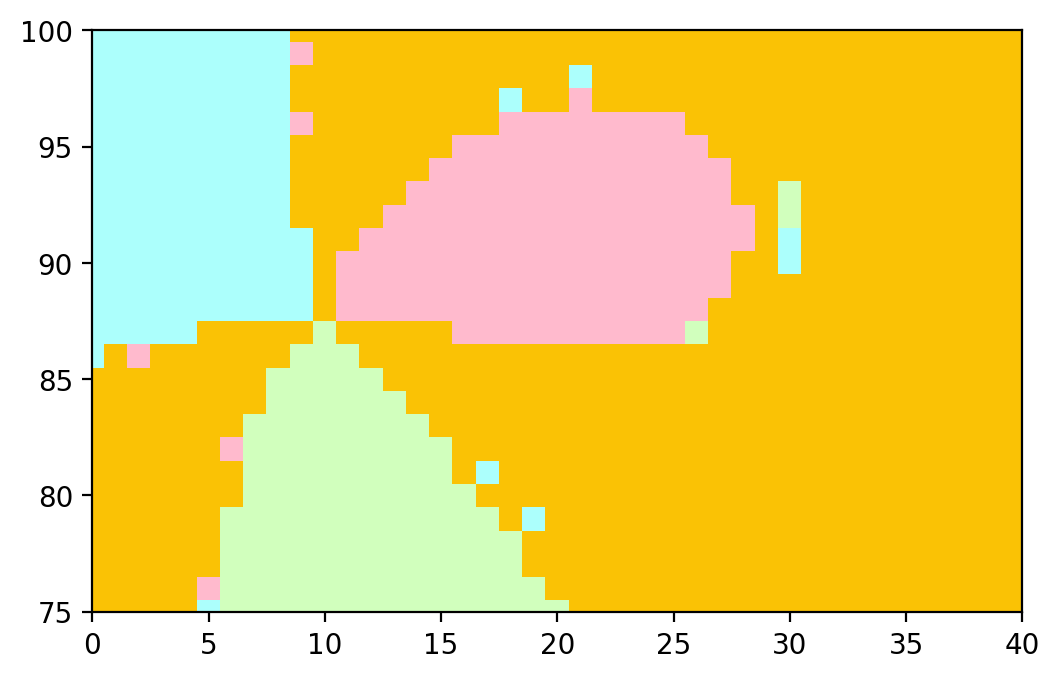

In [254]:
plt.rcParams['figure.dpi'] = 200 #this is rather high resolution, you can change it if needs be

# A list of colors to distinguish the roots.
colors = ['xkcd:goldenrod', 'xkcd:light cyan', 'xkcd:pastel pink', 'xkcd:very light green']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('on') #you can change this to off and remove the scale display
    plt.xlim(0, 40) #change the scale to highlight basins of attraction
    plt.ylim(75, 100) #here too
    #plt.xticks(np.arange(0, 40, 1))
    #freq_x = 5
    #plt.xticks(range(1, 40))
    plt.show()

f = lambda z: z**4 + z
fprime = lambda z: 4*z**3 + 1

plot_newton_fractal(f, fprime, n=500)

While the math here has indeed been developing and evolving for millenia, it is also at the base of new and revolutionary work, like machine learning.  
A few rabbit holes to follow:  
[stack exchange discussion on N-R and ML](https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning?newreg=46c30ed58ef84babbeab54b1aea8cbc4)  
[stack exchange discussion on critical points of functions](https://math.stackexchange.com/questions/140854/critical-points-of-a-function)  
[ML paper about deep learning, section on N-R](http://www.cs.toronto.edu/~jmartens/docs/Deep_HessianFree.pdf)